# 딥러닝 모델

In [4]:
import pandas as pd

df = pd.read_csv("../data/real_final.csv")

In [5]:
print(df.isnull().sum())

GameDate              0
home_Team             0
away_Team             0
Result                0
home_Recent_5_Win     0
home_Recent_5_Loss    0
home_OPS              0
home_BB               0
home_HBP              0
home_SO               0
home_ERA              0
home_BB_p             0
home_K                0
home_IR               0
home_IS               0
home_TBF              0
away_OPS              0
away_BB               0
away_HBP              0
away_SO               0
away_ERA              0
away_BB_p             0
away_K                0
away_IR               0
away_IS               0
away_TBF              0
dtype: int64


결측치가 없으므로 바로 진행

In [6]:
# feature와 label 나누기
X = df.drop(columns=['Result']) 
y = df['Result']

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 제외할 컬럼 따로 빼두기
exclude_columns = ['GameDate', 'home_Team', 'away_Team']

# 정규화할 대상만 선택
X_to_scale = X.drop(columns=exclude_columns)
X_scaled_part = pd.DataFrame(scaler.fit_transform(X_to_scale), columns=X_to_scale.columns)

# 정규화 안 한 컬럼 붙이기, 'GameDate' 컬럼 삭제 
X_scaled = pd.concat([X[exclude_columns].reset_index(drop=True), X_scaled_part], axis=1)
X_scaled = X_scaled.drop(columns=['GameDate'])

X_scaled

,home_Team,away_Team,home_Recent_5_Win,home_Recent_5_Loss,home_OPS,home_BB,home_HBP,home_SO,home_ERA,home_BB_p,...,away_OPS,away_BB,away_HBP,away_SO,away_ERA,away_BB_p,away_K,away_IR,away_IS,away_TBF
0,3,2,-1.123151,-1.988613,1.366961,0.327825,1.925650,0.561545,-2.128352,-2.461247,...,-0.388559,-2.454226,0.662535,-2.977683,0.657828,0.267085,0.584823,2.010263,1.115870,-1.285963
1,1,2,-1.947732,-1.988613,0.439188,-1.535076,-0.693715,-3.005585,-2.128352,-0.596254,...,-0.704798,-0.629802,-0.688682,-0.849651,1.337054,1.160169,-0.169115,2.010263,1.980492,-0.465123
2,3,0,-1.947732,-1.988613,-1.425193,1.259276,0.615968,-0.151881,-1.820268,-0.596254,...,0.183462,-0.629802,0.662535,-0.849651,-0.024417,-1.519081,-3.184866,0.028758,0.251248,-2.517223
3,5,6,-1.947732,-1.988613,-0.660885,-0.603625,-0.693715,0.561545,-0.896014,-2.461247,...,-1.686070,1.194622,0.662535,1.987727,-0.857602,-0.625998,-0.923052,-0.466619,-0.613374,-1.696383
4,7,8,-1.947732,-1.988613,-1.389849,-0.603625,-0.693715,-0.865307,-1.512183,1.268739,...,-1.588408,1.194622,-0.688682,1.278382,-2.137567,0.267085,2.092699,-0.466619,-0.613374,-1.696383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,0,3,-0.298569,0.471801,1.216750,-1.162496,-0.693715,0.704230,-0.340229,0.149743,...,0.411341,-2.089342,-0.688682,-0.140306,0.518964,0.445702,-2.581716,-0.466619,0.251248,-0.300955
3045,8,6,0.526012,-0.348337,0.174110,0.327825,0.615968,-0.865307,-0.199743,-0.409755,...,-0.183933,-0.629802,-0.688682,0.852776,-0.163281,-0.625998,1.187973,-0.961995,-0.613374,0.109466
3046,5,9,1.350593,-1.168475,2.237300,0.327825,-0.693715,1.845712,-0.187419,-0.223256,...,-0.328101,-0.447360,2.013752,0.569038,-1.125670,0.624319,-0.621477,1.514887,0.251248,-1.121795
3047,7,1,1.350593,-1.168475,-0.921545,0.327825,-0.693715,-2.720214,-0.649546,-1.715250,...,1.606539,0.099967,0.662535,0.994645,-0.054605,-0.090148,-0.470690,0.028758,1.115870,-0.465123


In [8]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 제외할 컬럼
exclude_columns = ['GameDate', 'home_Team', 'away_Team']

# 1. 정규화 대상만 선택
X_to_scale = X.drop(columns=exclude_columns)
X_scaled_part = pd.DataFrame(
    StandardScaler().fit_transform(X_to_scale),
    columns=X_to_scale.columns
)

# 2. 원-핫 인코딩 (prefix로 home/away 구분!)
team_encoded = pd.get_dummies(
    X[['home_Team', 'away_Team']].reset_index(drop=True),
    columns=['home_Team', 'away_Team'],
    prefix=['home_Team', 'away_Team']
).astype(int)

# 3. 정규화된 수치 + 인코딩된 팀 정보 결합
X_scaled = pd.concat([X_scaled_part.reset_index(drop=True), team_encoded], axis=1)


In [9]:
X_scaled

,home_Recent_5_Win,home_Recent_5_Loss,home_OPS,home_BB,home_HBP,home_SO,home_ERA,home_BB_p,home_K,home_IR,...,away_Team_0,away_Team_1,away_Team_2,away_Team_3,away_Team_4,away_Team_5,away_Team_6,away_Team_7,away_Team_8,away_Team_9
0,-1.123151,-1.988613,1.366961,0.327825,1.925650,0.561545,-2.128352,-2.461247,-3.134367,-0.971502,...,0,0,1,0,0,0,0,0,0,0
1,-1.947732,-1.988613,0.439188,-1.535076,-0.693715,-3.005585,-2.128352,-0.596254,-0.889796,0.467813,...,0,0,1,0,0,0,0,0,0,0
2,-1.947732,-1.988613,-1.425193,1.259276,0.615968,-0.151881,-1.820268,-0.596254,-0.889796,0.947584,...,1,0,0,0,0,0,0,0,0,0
3,-1.947732,-1.988613,-0.660885,-0.603625,-0.693715,0.561545,-0.896014,-2.461247,-1.637986,-0.971502,...,0,0,0,0,0,0,1,0,0,0
4,-1.947732,-1.988613,-1.389849,-0.603625,-0.693715,-0.865307,-1.512183,1.268739,2.102965,-0.491731,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,-0.298569,0.471801,1.216750,-1.162496,-0.693715,0.704230,-0.340229,0.149743,0.456947,-0.491731,...,0,0,0,1,0,0,0,0,0,0
3045,0.526012,-0.348337,0.174110,0.327825,0.615968,-0.865307,-0.199743,-0.409755,1.504413,-0.491731,...,0,0,0,0,0,0,1,0,0,0
3046,1.350593,-1.168475,2.237300,0.327825,-0.693715,1.845712,-0.187419,-0.223256,0.905861,-0.971502,...,0,0,0,0,0,0,0,0,0,1
3047,1.350593,-1.168475,-0.921545,0.327825,-0.693715,-2.720214,-0.649546,-1.715250,-0.141606,0.467813,...,0,1,0,0,0,0,0,0,0,0


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=3
)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2439, 42), (610, 42), (2439,), (610,))

In [12]:
# 모델 삭제 코드

import shutil
shutil.rmtree("my_tuning/kbo_dl_best")

In [13]:
import tensorflow as tf
from tensorflow.keras import layers
import keras_tuner as kt

def build_model(hp):
    model = tf.keras.Sequential()
    model.add(layers.Dense(
        hp.Int('units1', min_value=32, max_value=256, step=32),
        activation='relu',
        input_shape=(X_train.shape[1],)))
    model.add(layers.Dropout(hp.Float('dropout1', 0.1, 0.5, step=0.1)))
    
    model.add(layers.Dense(
        hp.Int('units2', min_value=16, max_value=128, step=16),
        activation=hp.Choice('activation2', ['relu', 'tanh'])))
    model.add(layers.Dropout(hp.Float('dropout2', 0.1, 0.5, step=0.1)))

    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('lr', 1e-4, 1e-2, sampling='log')),
        loss='binary_crossentropy',
        metrics=['accuracy'])

    return model


In [14]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20, 
    executions_per_trial=1,
    directory='my_tuning',
    project_name='kbo_dl_best')

tuner.search(X_train, y_train, epochs=30, validation_split=0.2)

Trial 20 Complete [00h 00m 08s]
val_accuracy: 0.8975409865379333

Best val_accuracy So Far: 0.8975409865379333
Total elapsed time: 00h 03m 00s


In [15]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(1)[0]

print("최적의 하이퍼파라미터:")
print(f"units1: {best_hps.get('units1')}")
print(f"dropout1: {best_hps.get('dropout1')}")
print(f"units2: {best_hps.get('units2')}")
print(f"activation2: {best_hps.get('activation2')}")
print(f"dropout2: {best_hps.get('dropout2')}")
print(f"lr: {best_hps.get('lr')}")

최적의 하이퍼파라미터:
units1: 256
dropout1: 0.1
units2: 80
activation2: tanh
dropout2: 0.2
lr: 0.0004442210821656491


c:\Users\82109\Documents\GitHub\KBO_Prediction_ML\KBO_DL_env\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\82109\Documents\GitHub\KBO_Prediction_ML\KBO_DL_env\lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [16]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

best_hps = tuner.get_best_hyperparameters()[0]

# input shape = 42 기준으로 다시 모델 생성
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(best_hps.get('units1'), activation='relu'),
    Dropout(best_hps.get('dropout1')),
    Dense(best_hps.get('units2'), activation=best_hps.get('activation2')),
    Dropout(best_hps.get('dropout2')),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=best_hps.get('lr')),
    loss='binary_crossentropy',
    metrics=['accuracy']
)



In [17]:
from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping 콜백 정의
early_stop = EarlyStopping(
    monitor='val_loss',     # 검증 손실을 기준으로
    patience=5,             # 5번 연속 개선 없으면 멈춤
    restore_best_weights=True # 가장 성능 좋았던 가중치로 복구
)

# 학습
history = model.fit(
    X_train, y_train,
    epochs=100,               # max epoch은 넉넉히
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],  # 여기에 콜백 넣기
    verbose=1
)


Epoch 1/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6877 - loss: 0.5884 - val_accuracy: 0.8504 - val_loss: 0.3640
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8776 - loss: 0.3430 - val_accuracy: 0.8668 - val_loss: 0.2991
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8725 - loss: 0.2988 - val_accuracy: 0.8791 - val_loss: 0.2783
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9074 - loss: 0.2558 - val_accuracy: 0.8832 - val_loss: 0.2751
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8986 - loss: 0.2524 - val_accuracy: 0.8873 - val_loss: 0.2804
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8966 - loss: 0.2639 - val_accuracy: 0.8811 - val_loss: 0.2782
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9142 - loss: 0.2194 - val_accuracy: 0.8852 - val_loss: 0.2776
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9103 - loss: 0.2233 - val_accuracy: 0.8730 - v

In [18]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8934 - loss: 0.2357 
Test Accuracy: 0.8836


In [19]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import numpy as np

# 🎯 예측 및 평가
y_proba = model.predict(X_test).ravel()
y_pred = (y_proba >= 0.5).astype(int)

print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("🎯 AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# 🔽 Train/Test 비교
y_train_proba = model.predict(X_train).ravel()
y_train_pred = (y_train_proba >= 0.5).astype(int)

y_test_proba = model.predict(X_test).ravel()
y_test_pred = (y_test_proba >= 0.5).astype(int)

print("📘 Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("📙 Test Accuracy :", accuracy_score(y_test, y_test_pred))
print("📘 Train AUC:", roc_auc_score(y_train, y_train_proba))
print("📙 Test AUC :", roc_auc_score(y_test, y_test_proba))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
🎯 Accuracy: 0.8836065573770492
🎯 AUC: 0.9595711702402481
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       294
           1       0.87      0.91      0.89       316

    accuracy                           0.88       610
   macro avg       0.88      0.88      0.88       610
weighted avg       0.88      0.88      0.88       610

[[251  43]
 [ 28 288]]
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
📘 Train Accuracy: 0.8987289872898729
📙 Test Accuracy : 0.8836065573770492
📘 Train AUC: 0.9631207918125505
📙 Test AUC : 0.9595711702402481


In [20]:
model.save('deep_learning_model.h5')

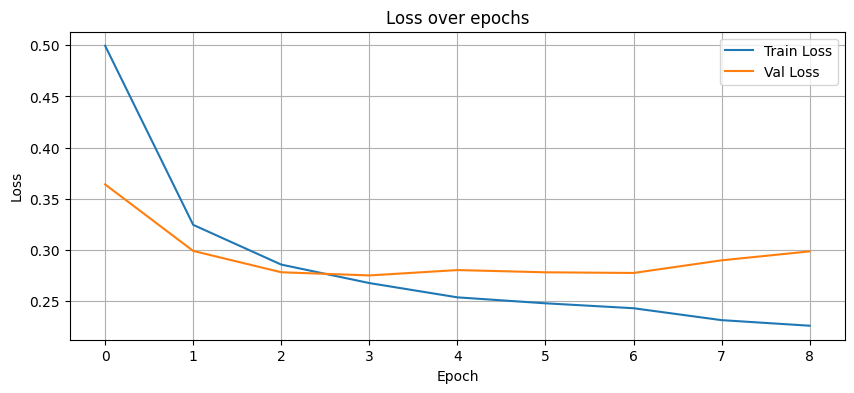

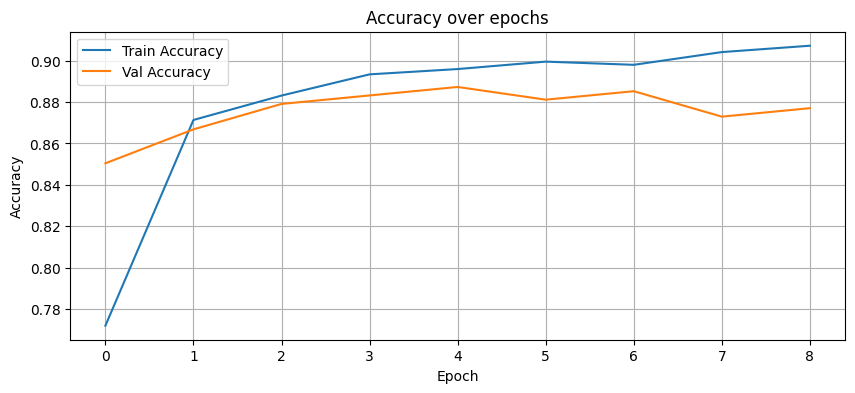

In [22]:
import matplotlib.pyplot as plt

# 📉 Loss 시각화
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 📈 Accuracy 시각화
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


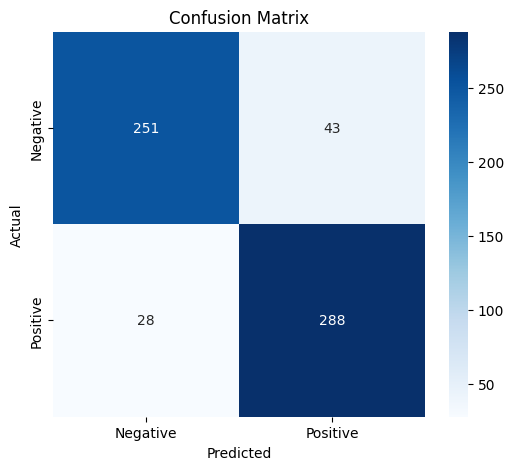

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


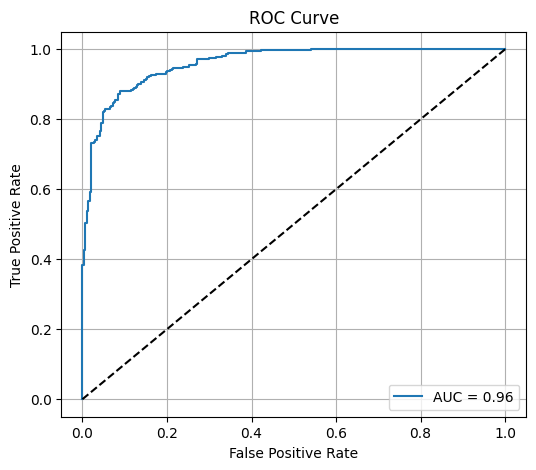

In [25]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # 무작위 예측 기준선
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
